In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 

                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [4]:
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)

#### Visualization

In [5]:
import numpy as np
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 

In [20]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

def viz_alg_1d_2(w):
  it = len(w)    
  fig, ax = plt.subplots(figsize=(5, 5))  
  
  for i in range(len(w)):
    plt.cla()
    #points
    plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
    plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
    plt.axis([0 , 6, -2, 4])

    draw_line(w[i])

    if i < len(w) - 1:
      # draw one  misclassified point
      circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
      ax.add_artist(circle)

    label = 'PLA: iter %d/%d' %(i, len(w))
    ax.set_xlabel(label)
      
    plt.show()

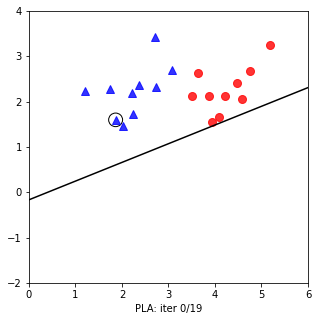

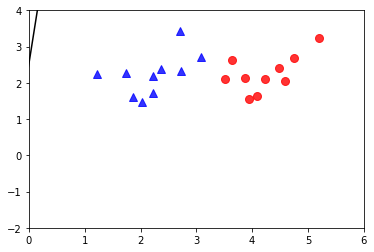

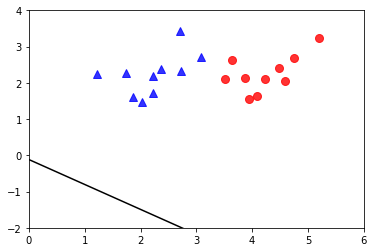

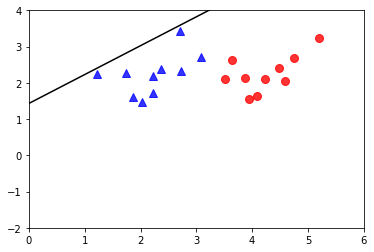

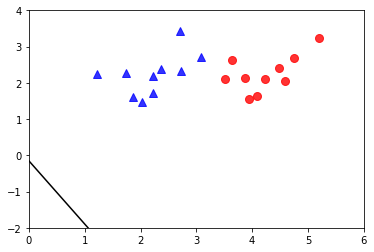

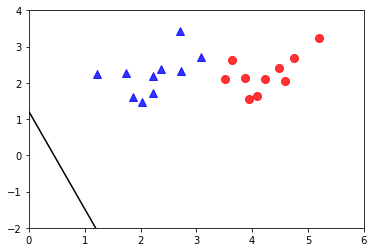

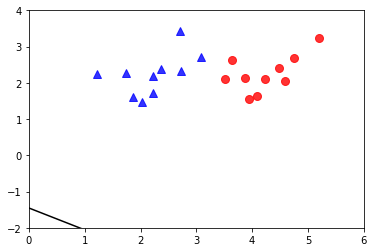

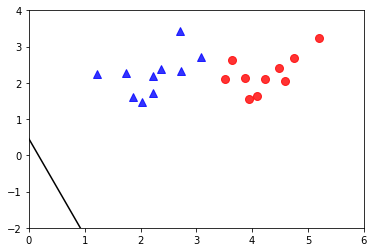

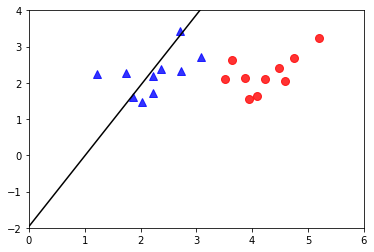

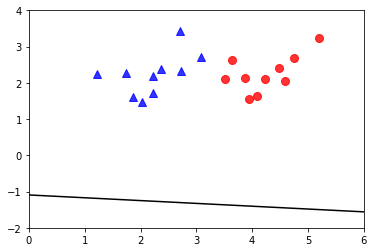

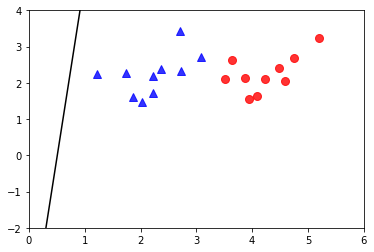

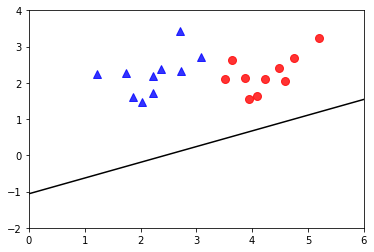

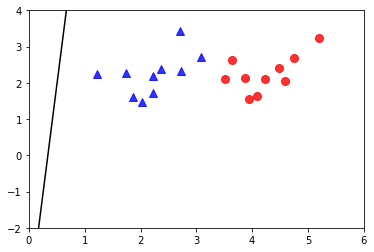

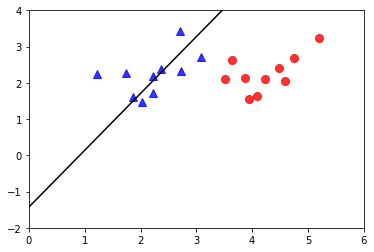

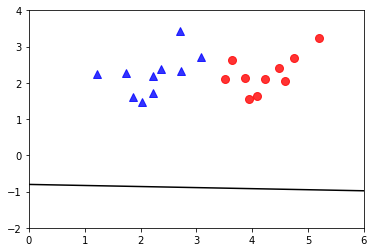

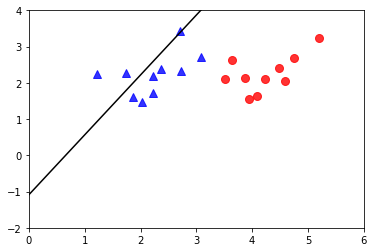

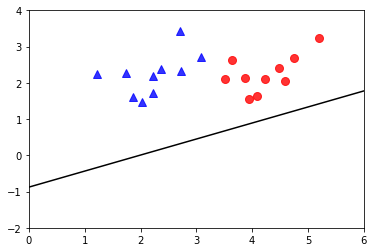

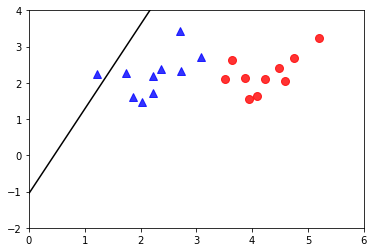

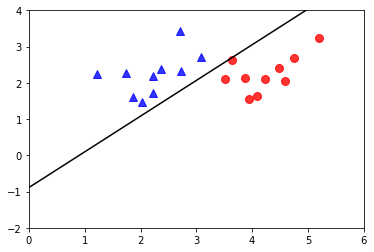

In [21]:
viz_alg_1d_2(w)